##### Random Forest, relatively simple to understand and interpret, and in this case adapts well since it's a small dataset.


In [1]:
import tensorflow as tf
import sklearn as skl
import keras_tuner as kt
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
from config import CONNSTRING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Create a database engine
engine = create_engine(CONNSTRING)

# Define your SQL query
query = "SELECT * FROM PatientData"

# Use pandas to read the data into a DataFrame
liver_data_df = pd.read_sql(query, engine)
liver_data_df.head()

,age,gender,bmi,alcoholconsumption,smoking,geneticrisk,physicalactivity,diabetes,hypertension,liverfunctiontest,diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [3]:
# Split our data into our features and target arrays
X = liver_data_df.copy()
X.drop('diagnosis', axis=1, inplace=True)
y = liver_data_df['diagnosis']

In [4]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Create a StandardScaler instances
X_scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1550, max_features='sqrt', random_state=78)

In [7]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [8]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [9]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [10]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8917647058823529

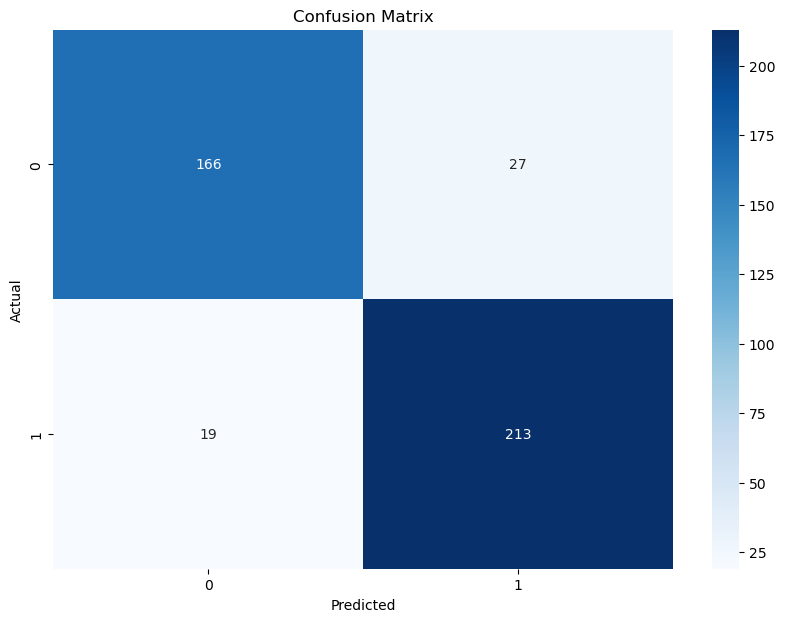

In [11]:
# Confusion Matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()